# Neural Network Regression with TensorFlow
let's do hands on the regression.

In [1]:
# Import TensorFlow
import tensorflow as tf
tf.__version__

'2.19.0'

## Import the libraries for data visualization

In [2]:
import numpy as np
import matplotlib.pyplot as plt

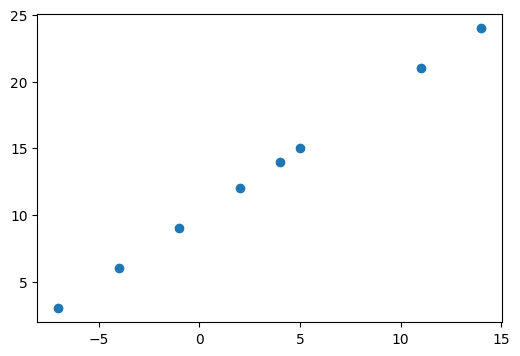

In [9]:
# Create features
X = np.array([-7., -4., -1., 2., 4., 5., 11., 14.])

# create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 14.0, 15.0, 21.0, 24.0])

# Visualize this
plt.figure(figsize=(6,4))
plt.scatter(X,y);

In [12]:
# check the relationship for y = x+10
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [15]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([10000])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([10000], dtype=int32)>)

In [16]:
X.shape, y.shape, X[0].shape, y[0].shape

((8,), (8,), (), ())

In [18]:
# check for the dimension
X[0].ndim

0

## Turn our NumPy arrays into tensors

In [19]:
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  4.,  5., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 14., 15., 21., 24.])>)

In [21]:
# check the shapes in TF
X.shape, y.shape, X[0].shape, y[0].shape

(TensorShape([8]), TensorShape([8]), TensorShape([]), TensorShape([]))

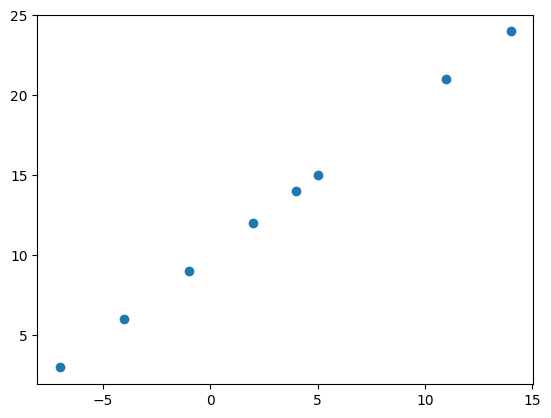

In [22]:
plt.scatter(X, y);

## Steps in modeling with TensorFlow
1. `Creating a Model`-define the and output layers, as well as the hidden layers of a deep learning model.
2. `Compiling a Model`-define the **loss function** (in other words, the function which tells our model how wrong it is) and the **optimizer** (tells our model how to improve the patterns its learning) and **evaluation metrics** (what we can use to interpret the performance of our model.)
3. `Fitting a Model`-letting the model try to fing parrerns betwwn X and y (features and labels).

In [23]:
# set a random seed
tf.random.set_seed(24)

### **1. Creating a Model**  
Define the **input, output**, and **hidden layers** of a deep learning model.

In [45]:
# Define a model using Sequantial API
model = tf.keras.Sequential([
    # The input_shape should match the *features* per sample.
    # Since each sample in our reshaped X has 1 feature, it's (1,)
    tf.keras.layers.Dense(1, input_shape=(1,)) # This is a single-layer perceptron (or a linear model)
])

### **2. Compiling a Model**  
Define the **loss function**, **optimizer**, and **evaluation metrics** to guide model improvement.
- **loss** - How wrong your model's predictions are compared to the truth labels (you want to minimise this).
- **optimizer** - how your model should update its internal pattern to better its predictions.
- **metrics** - human interpretable values for how well our model is doing.

In [46]:
# Compile the model
model.compile(
    loss=tf.keras.losses.mae,  # or simply write "mae": Defines how errors are measured
    optimizer=tf.keras.optimizers.SGD(),  # or simply write "SGD"": Defines how patterns are learned
    metrics=['mae']  # Defines how performance is evaluated
)

### **3. Fitting a Model**  
Train the model by finding patterns between `X` (features) and `y` (labels).
- **epochs**-How many times the model will go through all of the training example.

In [47]:
# Fit the model (train the model on data)
# So, the shape of X will change from (8,) to (8, 1), which is what the Dense layer expects.
X = tf.reshape(X, shape=(-1,1)) # By using tf.reshape(X, shape=(-1, 1)), you are transforming X into a 2-d tensor
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 11.7741 - mae: 11.7741   
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 11.6741 - mae: 11.6741
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - loss: 11.5741 - mae: 11.5741
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 11.4741 - mae: 11.4741
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 11.3741 - mae: 11.3741


### **4. Predict and Evalute the model**  
- make the predictions
- evaluate the model on the test data (how reliable our model's predictions?)

In [52]:
# Make a prediction using the modle
model.predict(tf.constant([[25.]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


array([[14.015434]], dtype=float32)

Note that there was a relationship in feature $x$ and label $y$ s.t. $y = x + 10$, here it is not satisfied. Since $25+10 = 35 \ne 14.015434 \pm 11.3741$
> Our neural network didn't work well.

## Improving our model
We can improbe our model , by alterring the steps we took to create the model.
1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activationfunction of each layer.
2. **Compliing a modle** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more exaples to learn from).

```mermaid
graph LR
A("smaller model") --> B("larger model")

```

In [53]:
# Let's rebuild our model by changing just one hyper-parameter "epoch"
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,))
])

# Compile the model
model.compile(
    loss=tf.keras.losses.mae, 
    optimizer=tf.keras.optimizers.SGD(),  
    metrics=['mae']  
)

# Fit the model (train the model on data)
X = tf.reshape(X, shape=(-1,1)) 
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 11.3210 - mae: 11.3210
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 11.2210 - mae: 11.2210
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 11.1210 - mae: 11.1210
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - loss: 11.0210 - mae: 11.0210
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 10.9210 - mae: 10.9210
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - loss: 10.8210 - mae: 10.8210
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 10.7210 - mae: 10.7210
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 10.6210 - mae: 10.6210
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 10.5210 - mae: 10.5210
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 10.4210 - mae: 10.4210
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 10.3210 - mae: 10.3210
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - loss: 10.2210 - mae: 10.2210
Epoch 13/100
1/1

In [55]:
model.predict(tf.constant([[25.]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


array([[42.60681]], dtype=float32)

look it is so much closer to 35.0 the error is +7, previously it was about -21. 💪 

### Lets see if we can make another change to improve our model
this time with an extra hidden layer with 100 units.

In [64]:
# Let's rebuild our model by adding a extra layer 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu', input_shape=(1,)),  # Hidden layer 1
    tf.keras.layers.Dense(1)                                         # Output layer
])


# Compile the model
model.compile(
    loss=tf.keras.losses.mae, 
    optimizer=tf.keras.optimizers.SGD(),  
    metrics=['mae']  
)

# Fit the model (train the model on data)
model.fit(X, y, epochs=100); # don't need to reshape X since we have done it once

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 11.5237 - mae: 11.5237
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 11.0437 - mae: 11.0437
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 10.5585 - mae: 10.5585
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 10.0580 - mae: 10.0580
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 9.5319 - mae: 9.5319
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 8.9883 - mae: 8.9883
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 8.4156 - mae: 8.4156
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 7.8124 - mae: 7.8124
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - loss: 7.1738 - mae: 7.1738
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - loss: 6.4957 - mae: 6.4957
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 5.7765 - mae: 5.7765
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 5.0052 - mae: 5.0052
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━

In [65]:
# Make prediction
model.predict(tf.constant([[25.]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


array([[45.7463]], dtype=float32)

#### Note:
* The current model's prediction (45.7) on new data is worse than the previous model's (~43), even though the actual value is 35.0. However, the current model's training error (MAE ≈ 4) is better than the previous model's (MAE ≈ 7).
This happens because the current model fits the training data too well, capturing noise instead of general patterns — a classic case of **overfitting**. 

---

#### Key Observations
| Metric               | Previous Model | Current Model | Actual Value |
|----------------------|----------------|---------------|--------------|
| Training MAE         | ~7             | **~4**        | -            |
| New Data Prediction  | ~43            | 45.7          | 35.0         |
| New Data Error       | ~8             | **~10.7**     | -            |

- **Lower training MAE**: The current model fits the training data more closely.
- **Higher test error**: Worse performance on unseen data indicates overfitting.

### Common ways to improve a deep model:
1. Adding layers
2. Increase the number of hidden units
3. Change the activation functions
4. Change the optimization function
5. Change the learning rate
6. Fitting on more data
7. Fitting for longer ( increase the epochs)

>Because you can alter each of these, they're **hyperparameters**.

#### Lets change the optimizer of our model

In [70]:
# Let's rebuild our model by changing the optimizer and learning rate
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu', input_shape=(1,)),  # Hidden layer 1
    tf.keras.layers.Dense(1)                                         # Output layer
])


# Compile the model
model.compile(
    loss=tf.keras.losses.mae, 
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),  
    metrics=['mae']  
)

# Fit the model (train the model on data)
model.fit(X, y, epochs=100); 

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 913ms/step - loss: 13.4883 - mae: 13.4883
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 12.7332 - mae: 12.7332
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 11.9612 - mae: 11.9612
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 11.1844 - mae: 11.1844
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 10.4619 - mae: 10.4619
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 9.8982 - mae: 9.8982
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 9.3234 - mae: 9.3234
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 8.7264 - mae: 8.7264
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 8.1041 - mae: 8.1041
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 7.4580 - mae: 7.4580
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 6.7870 - mae: 6.7870
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 6.0868 - mae: 6.0868
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [71]:
# Make prediction
model.predict(tf.constant([[25.]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


array([[36.4575]], dtype=float32)

**Using the Adam optimizer with a learning rate of 0.01 helps the model converge faster and improves prediction accuracy.**
> The model's prediction (~36) is now very close to the actual value (35), indicating better generalization.


## Evaluating a Model

In practice, a typical workflow you will go through when building a neural network is:

```mermaid
graph TB
    A("Build a model") --> B("Fit it")
    B --> C("Evaluate it")
    C --> D("Tweak the model")
    D --> B
```

When it comes to evaluation, visualizing the data can be very helpful. It’s a good idea to visualize:

- **The data** — What data are we working with? What does it look like?
- **The model itself** — What does our model architecture look like?
- **The training process** — How does the model perform while it learns?
- **The model’s predictions** — How do the predictions line up against the ground truth (actual labels)?

## Make a bigger dataset 
This is step 6 mentioned above for "Common ways to improve DL model"

In [78]:
# Create the dataset with increase by 4
X = tf.range(-100, 100, 4)
X = tf.reshape(X, shape=(-1, 1))
X = tf.random.shuffle(X)
X

<tf.Tensor: shape=(50, 1), dtype=int32, numpy=
array([[ -12],
       [  -4],
       [ -84],
       [  36],
       [ -52],
       [  44],
       [-100],
       [  92],
       [ -20],
       [  32],
       [  64],
       [  84],
       [ -60],
       [ -68],
       [   4],
       [  16],
       [ -56],
       [  68],
       [  88],
       [  52],
       [  48],
       [ -36],
       [   8],
       [  12],
       [  60],
       [   0],
       [ -96],
       [  80],
       [ -16],
       [ -88],
       [  40],
       [ -44],
       [  76],
       [ -80],
       [ -72],
       [  56],
       [ -76],
       [  28],
       [  96],
       [ -92],
       [  -8],
       [ -40],
       [  24],
       [ -48],
       [ -32],
       [  20],
       [ -64],
       [ -24],
       [ -28],
       [  72]], dtype=int32)>

In [79]:
# make a labels for the dataset
y = X + 10 ## this is actual relationship 
y

<tf.Tensor: shape=(50, 1), dtype=int32, numpy=
array([[ -2],
       [  6],
       [-74],
       [ 46],
       [-42],
       [ 54],
       [-90],
       [102],
       [-10],
       [ 42],
       [ 74],
       [ 94],
       [-50],
       [-58],
       [ 14],
       [ 26],
       [-46],
       [ 78],
       [ 98],
       [ 62],
       [ 58],
       [-26],
       [ 18],
       [ 22],
       [ 70],
       [ 10],
       [-86],
       [ 90],
       [ -6],
       [-78],
       [ 50],
       [-34],
       [ 86],
       [-70],
       [-62],
       [ 66],
       [-66],
       [ 38],
       [106],
       [-82],
       [  2],
       [-30],
       [ 34],
       [-38],
       [-22],
       [ 30],
       [-54],
       [-14],
       [-18],
       [ 82]], dtype=int32)>

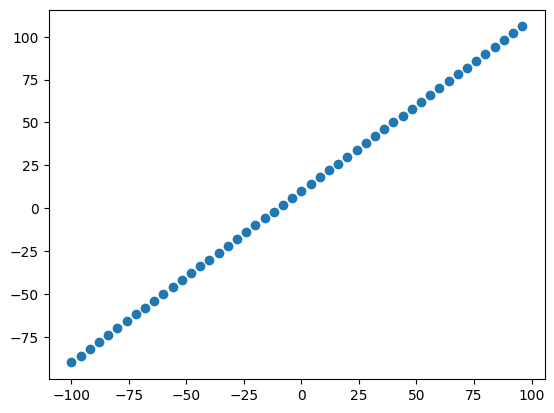

In [80]:
# visualize the dataset
plt.scatter(X, y);

### The 3 Sets in Machine Learning

- **Training set** — The model learns from this data, which typically comprises **70-80%** of the total data available.
- **Validation set** — The model gets tuned on this data, usually about **10-15%** of the total data. It helps in hyperparameter tuning and preventing overfitting.
- **Test set** — The model is evaluated on this data to assess what it has learned. This set also typically makes up **10-15%** of the total data and is used only after training and validation are complete.

---

This distribution ensures the model learns well, is properly tuned, and is fairly evaluated on unseen data.

In [81]:
# check the shape of dataset for splitting purpose
X.shape

TensorShape([50, 1])

In [84]:
# split the data into train and test data
X_train = X[:40]   # First 40 samples for training
X_test = X[40:]    # Remaining samples for testing

y_train = y[:40]   # Corresponding 40 labels for training
y_test = y[40:]    # Remaining labels for testing

### Visualizing the splitted data
Now we have got our data in trianing and test sets...

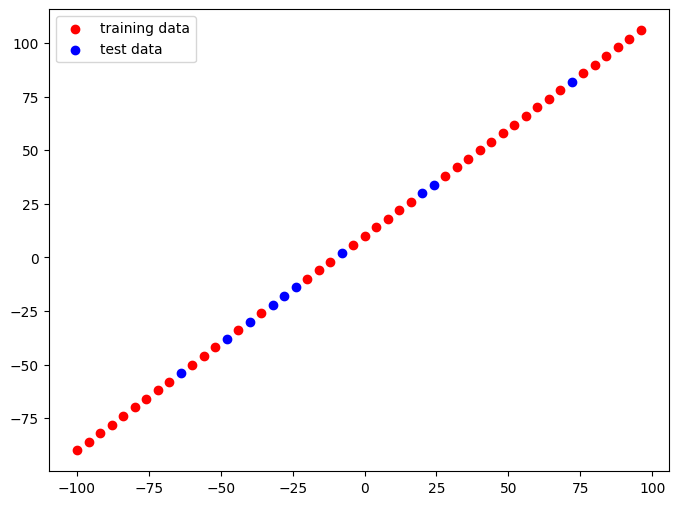

In [87]:
# set the figure size
plt.figure(figsize=(8, 6))

# plot training data
plt.scatter(X_train, y_train, c='r', label="training data")

# plot the test data
plt.scatter(X_test, y_test, c='b', label="test data")

plt.legend(); # show legends

### Let's rebuild the model 


In [89]:
X.shape

TensorShape([50, 1])

In [144]:
# create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,)), # When your data X is (samples, features), the input_shape should be (features,).
])

# Compile the model
model.compile(
    loss=tf.keras.losses.mae, 
    optimizer=tf.keras.optimizers.SGD(),  
    metrics=['mae']  
)

#### Summary of model architecture

In [145]:
model.summary()

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_38 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

#### 🗝 Notes on Model's Summary:

- In TensorFlow Keras, `tf.keras.layers.Dense` is a **fully connected layer**, meaning each neuron receives input from **all neurons** in the previous layer.
- It’s called "Dense" because every input feature connects to every neuron in the layer, and each neuron connects to all neurons in the next layer (if any).

**Key terms in the model summary:**

- **Total params** — The total number of parameters (weights and biases) in the entire model.
- **Trainable params** — Parameters that the model updates during training to learn patterns.
- **Non-trainable params** — Parameters that remain fixed during training, often coming from pre-trained models in **transfer learning**.

In [146]:
# Fit the model (train the model on data)
model.fit(X_train, y_train, epochs=100, verbose=0); # verbose = 0 means no progress bar

##### Make the prediction

In [147]:
 y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


In [148]:
# Get model summary
model.summary()

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_38 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [160]:
# make the shape same as test set to perform matrix operation
y_pred = tf.reshape(y_pred, shape=y_test.shape)
y_test = tf.cast(y_test, tf.float32)

#### Visualize the model using plot_model

In [161]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True) # to view shapes set True otherwise left it

You must install pydot (`pip install pydot`) for `plot_model` to work.


## Visualizing Model's Predictions
To visualiz predictions, it's a good idea to plot them against the ground truth label

Often you'll see this in the form y_test or y_test 🆚 y_pred (ground truth vs model's predicitons)

In [162]:
y_pred, y_test

(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[ -9.065285],
        [-52.58142 ],
        [ 34.45085 ],
        [-63.46045 ],
        [-41.702385],
        [ 29.011335],
        [-85.21852 ],
        [-30.82335 ],
        [-36.26287 ],
        [ 99.72506 ]], dtype=float32)>,
 <tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[  2.],
        [-30.],
        [ 34.],
        [-38.],
        [-22.],
        [ 30.],
        [-54.],
        [-14.],
        [-18.],
        [ 82.]], dtype=float32)>)

**🗝 Note:** if you feel like you are going to reuse some kind of functionality in the future, it is good idea to make function.

In [163]:
# Let's create a plotting function
def plot_predictions(train_data, train_labels, test_data, test_labels, predictions):
    """Plots training data, test data and compares predictions to actual laberls"""    
    plt.figure(figsize=(8, 6))

    plt.scatter(train_data, train_labels, c="g", label="Test data")

    plt.scatter(test_data, test_labels, c="b", label="Training data")

    plt.scatter(test_data, predictions, c="r", label="Predictions")

    plt.legend();

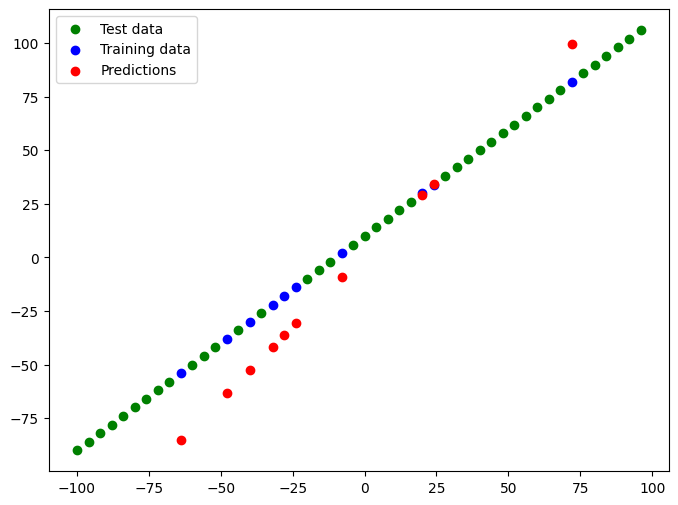

In [164]:
# call the plot function
plot_predictions(X_train, y_train, X_test, y_test, y_pred)

## Evaluating model's predictions with regression evaluation metrics
Depending on the problem you are working on, there will be different evaluation metrics to evaluate the model's performance.

Since we're working on a regression, two of the main metrics:
* **MAE** - mean absolute, "on average, how wrong is each of my model's predictions"
* **MSE** - mean squared error, "square the average error."

---

| Metric   | Formula                                                                 | TensorFlow Code                      | When to Use                                                                                     |
|----------|-------------------------------------------------------------------------|--------------------------------------|--------------------------------------------------------------------------------------------------|
| **MAE**  | $\text{MAE} = \frac{1}{N} \sum_{i=1}^N |y_i - \hat{y}_i|$          | `tf.keras.losses.MAE()`               | - Use for regression when you want errors in the same units as the target.<br>- Less sensitive to outliers. |
| **MSE**  | $\text{MSE} = \frac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2$            | `tf.keras.losses.MSE()`               | - Use when large errors should be penalized more.<br>- More sensitive to outliers.             |
| **Huber**| $L_\delta(y, \hat{y}) = \begin{cases} \frac{1}{2}(y - \hat{y})^2 & \text{for } |y - \hat{y}| \leq \delta \\ \delta (|y - \hat{y}| - \frac{1}{2}\delta) & \text{for } |y - \hat{y}| > \delta \end{cases}$ | `tf.keras.losses.Huber()` | - Use when you want a loss function that is robust to outliers<br> but behaves like MSE near zero errors. |

In [165]:
# Evaluate the modle on the test
model.evaluate(X_test, y_test) # this just return same as the fitting the data.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 880ms/step - loss: 16.4279 - mae: 16.4279


[16.427885055541992, 16.427885055541992]

#### Mean absolute error

In [172]:
# make the shape same as test set that flatten them into the shape of (n, )
y_pred = tf.squeeze(y_pred)
y_test = tf.squeeze(y_test)

# Calculate the MEAN ABSOLUTE ERROR 
mae = tf.keras.losses.MAE(y_test, y_pred)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=16.427885055541992>

#### Mean square error

In [173]:
# calculate the mse
mse = tf.keras.losses.MSE(y_test, y_pred)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=357.5291748046875>

In [174]:
# make function to reuse MAE and MSE
def mae_mse(y_test, y_pred):
    mae = tf.keras.losses.MAE(y_test, y_pred)
    mse = tf.keras.losses.MSE(y_test, y_pred)
    return {"mae": mae.numpy(), "mse": mse.numpy()}

In [175]:
mae_mse(y_test, y_pred)

{'mae': np.float32(16.427885), 'mse': np.float32(357.52917)}

## Running experiments to improve the model
**To Reduce the Error**: do the same process as before
```mermaid
graph TB
    A("Build a model") --> B("Fit it")
    B --> C("Evaluate it")
    C --> D("Tweak the model")
    D --> B
```
Let's do 3 modeling experiments:
1. `model_1` - same as the original model, 1 layer, trained for 100 epochs
2. `model_2` - 2 layers, trained, for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

#### Build the model_1

In [176]:
# Set the random seed
tf.random.set_seed(24)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,))
])

# 2. Compile the model
model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

# 3. Fit the data
model_1.fit(X_train, y_train, epochs=100, verbose=False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


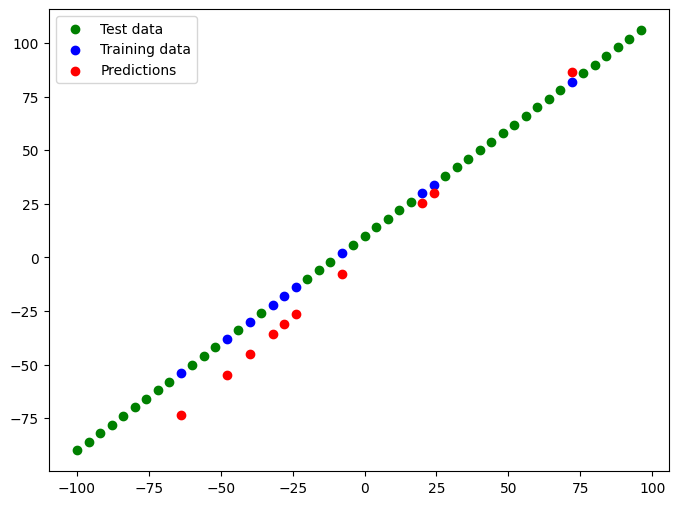

In [177]:
# Make and plot predictions for the model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(X_train, y_train, X_test, y_test, y_preds_1)

In [179]:
# Calculate model_1 evaluation metrics
error_1 = mae_mse(y_test, tf.squeeze(y_preds_1))
error_1

{'mae': np.float32(11.374811), 'mse': np.float32(156.38443)}

#### Build the model_2
* 2 dense layers, trained for 100 epochs

In [193]:
# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(1,)), # Hidden layer
    tf.keras.layers.Dense(1)                     # Output layer
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae']
               )

# 3. Fit the data
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step - loss: 52.0859 - mae: 52.0859
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 62.7159 - mae: 62.7159 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 36.7014 - mae: 36.7014
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 13.6717 - mae: 13.6717
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 31.3203 - mae: 31.3203
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 11.0124 - mae: 11.0124
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 53.2702 - mae: 53.2702
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 24.0358 - mae: 24.0358
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 9.9270 - mae: 9.9270
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 9.8515 - mae: 9.8515
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 13.6452 - mae: 13.6452
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 31.3699 - mae: 31.3699
Epoch 13/100
2/2 ━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


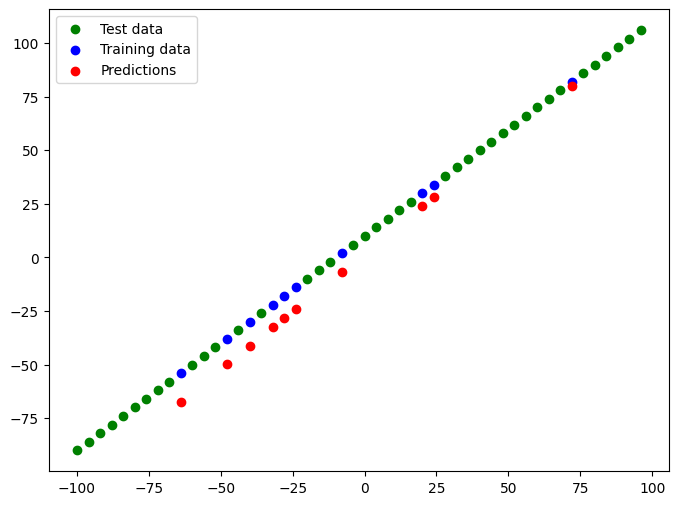

In [194]:
# make the prediction and plot it
y_preds_2 = model_2.predict(X_test)
plot_predictions(X_train, y_train, X_test, y_test, y_preds_2)

In [195]:
# Calculate model_2 evaluation metrics
error_2 = mae_mse(y_test, tf.squeeze(y_preds_2))
error_2

{'mae': np.float32(8.985358), 'mse': np.float32(91.250465)}

#### Build the model_3
* 2 layers, trained for 500 epochs

In [196]:
# Set random seed
tf.random.set_seed(24)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(1,)),
    tf.keras.layers.Dense(1)
])


# 2. Compile the model
model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

# Fit the data to the model
model_3.fit(X_train, y_train, epochs=500, verbose=0);

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


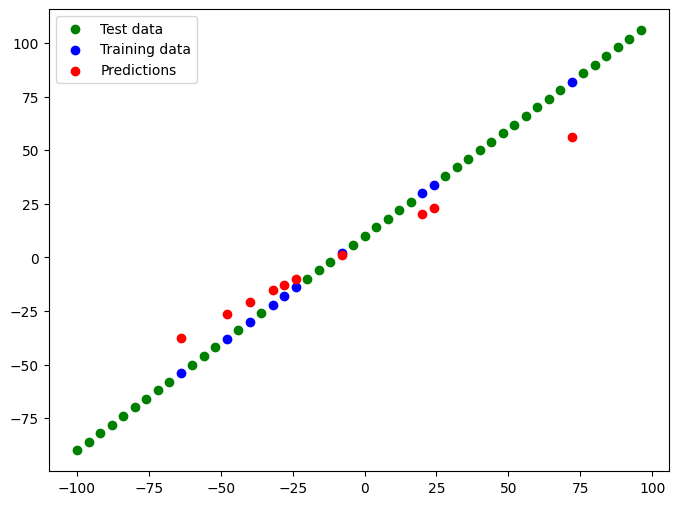

In [197]:
# Make predictions and plot it
y_preds_3 = model_3.predict(X_test)
plot_predictions(X_train, y_train, X_test, y_test, y_preds_3)

In [198]:
# Calculate model_2 evaluation metrics
error_3 = mae_mse(y_test, tf.squeeze(y_preds_3))
error_3

{'mae': np.float32(10.064527), 'mse': np.float32(146.52644)}

🗝 **Note:** Start with small experiments (small models) and make sure they work and then increase their scale when necessary.

## Comparing the results of our experiments
We've run a few experiments, let's compare the results.

In [209]:
# Let's compare our model's results using pandas dataframe
import pandas as pd

model_results = pd.DataFrame([['model_1', error_1['mae'], error_1['mse']],
                              ['model_2', error_2['mae'], error_2['mse']],
                              ['model_3', error_3['mae'], error_3['mse']]
                             ], 
                             columns=['model', 'mae', 'mse']
                            )

In [210]:
# View the DataFrame
model_results

,model,mae,mse
0,model_1,11.374811,156.384430
1,model_2,8.985358,91.250465
2,model_3,10.064527,146.526443


#### Looks like `model_2` perfomed the best...

In [211]:
model_2.summary()

Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_50 (Dense)                     │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Looks like **model_2** performed the best...

🗝 **Note:** One of our main goals should be to minimize the time between our experiments. The more experiments you do, the more things you'll figure out which don't work and, in turn, get closer to figuring out what does work. Remember the machine learning practitioner's motto:  
**"Experiments, Experiments, Experiments"**

## Tracking the Experiments (models)

One really good habit in ML modeling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

📙 **Resources:** As you build more models, you'll want to look into using:
- [TensorBoard](https://www.tensorflow.org/tensorboard) – a component of the TensorFlow library to help track modeling experiments
- [Weights & Biases](https://wandb.ai/site/) – a tool for tracking all kinds of ML experiments

Other popular tools include MLflow, CometML, and Neptune, which provide robust experiment tracking features for larger projects.


## **Saving our models**
Saving our models allows us to use them outside of the virtual environment (or wherever they were trained) such as in a web application or a mobile app 🚀.

In TensorFlow, you can save models in **two primary ways**:

### **1. `.keras` or `.h5` format**
This method saves the **architecture, weights, and optimizer configuration**, allowing full restoration later.
  - Handy for Keras models.
  - More compatible with older versions of TensorFlow/Keras.

```python
model.save("model.keras")  # Recommended format
```
Note: `.h5` still works but it is now **legacy**.

---

### **2. `SavedModel` format**
  - TensorFlow’s standard format for model saving.
  - Compatible with deployment in **TensorFlow Serving** and **TF Lite**.

```python
model.save("saved_model_directory")  
```

In [223]:
# Save the entire model in SavedModel format (recommended)
model_2.export("best_model_SavedModel_format");

INFO:tensorflow:Assets written to: best_model_SavedModel_format\assets


INFO:tensorflow:Assets written to: best_model_SavedModel_format\assets


Saved artifact at 'best_model_SavedModel_format'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor_77')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2380863318048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2380865038016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2380865028864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2380865038544: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [238]:
# Save in keras format 
model_2.save("best_model_keras_format.keras")  
print("Model saved!")

Model saved!


## Loading in saved model

In [239]:
# Load the model
new_model = tf.keras.models.load_model('best_model_keras_format.keras')

In [240]:
# Show the model architecture
new_model.summary()

Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_50 (Dense)                     │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 64 (260.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 33 (136.00 B)

In [241]:
# make prediction and do comparison with model_2
y_new_pred = new_model.predict(X_test)
y_new_pred == y_preds_2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

#### Load via `SavedModel` format

In [322]:
# Load the SavedModel from the directory
loaded_model = tf.saved_model.load("best_model_SavedModel_format")

# Get the default serving signature for inference
saved_model_2 = loaded_model.signatures["serving_default"]

In [323]:
# Make predictions (ensure input matches the model's expected signature)
predictions = saved_model_2(tf.cast(X_test, dtype=tf.float32))

# Verify predictions match original model's outputs (Use np.allclose() for floating-point tolerance)
prediction_output = predictions['output_0'].numpy()
print("Predictions match original model:", np.allclose(prediction_output, y_preds_2, atol=1e-6))

Predictions match original model: True


In [324]:
# Calculate MAE and MSE using your custom function
mae_mse(y_test, tf.squeeze(prediction_output))

{'mae': np.float32(8.985358), 'mse': np.float32(91.250465)}